# Objective

The goal of this Exploratory Data Analysis (EDA) is to extensively investigate the provided dataset, with a particular emphasis on understanding the link between various variables and the target variable, Salary.



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the data

In [4]:
df=pd.read_excel(r"data.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [6]:
df.duplicated().sum()

0

# DATA CLEANING

In [7]:
df[df==-1].count()

Unnamed: 0                  0
ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg 

### Datatypes Conversion


replacing the present value in DOL with 2024-02-20.

In [9]:
df['DOL'].replace('present','2024-02-20', inplace = True)
df['DOL'] = pd.to_datetime(df['DOL'])
df['DOJ'] = pd.to_datetime(df['DOJ'])
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [11]:
df.dtypes


Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [20]:
dates = df[(df['DOL'] < df['DOJ'])].shape[0]
print(f'DOL is earlier than DOJ for {dates} observations.')
print(df.shape)


DOL is earlier than DOJ for 40 observations.
(3998, 39)


In [32]:
df= df.drop(df[~(df['DOL'] > df['DOJ'])].index)
print(df.shape)

(3943, 39)


In [26]:
print((df['10percentage'] <=10).sum())
print((df['12percentage'] <=10).sum())
print((df['collegeGPA'] <=10).sum())

0
0
12


In [30]:
df['10board'] = df['10board'].replace({'0':np.nan})
df['12board'] = df['12board'].replace({'0':np.nan})
df['GraduationYear'] = df['GraduationYear'].replace({0:np.nan})
df['JobCity'] = df['JobCity'].replace({'-1':np.nan})
df['Domain'] = df['Domain'].replace({-1:np.nan})
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].replace({-1:0})
df['ComputerScience'] = df['ComputerScience'].replace({-1:0})
df['ComputerProgramming'] = df['ComputerProgramming'].replace({-1:np.nan})

In [33]:
#Imputing categorical columns with mode values for their respective columns.

df['10board'].fillna(df['10board'].mode()[0], inplace = True)
df['12board'].fillna(df['12board'].mode()[0], inplace = True)
df['GraduationYear'].fillna(df['GraduationYear'].mode()[0], inplace = True)
df['JobCity'].fillna(df['JobCity'].mode()[0], inplace = True)

In [34]:
#Imputing the numerical columns with median values for their respective columns.
df['Domain'].fillna(df['Domain'].median(), inplace = True)
df['ComputerProgramming'].fillna(df['ComputerProgramming'].median(), inplace = True)
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,0,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,...,0,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,...,0,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,0,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,...,0,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [41]:
#tenure column by subtracting the DOL from DOJ
delta = (df['DOL'] - df['DOJ'])
tenure = np.zeros(len(df))
for i, date in enumerate(delta):
    tenure[i] = round(date.days/365,2)
df['Tenure'] = tenure

In [43]:
#Dropping the rows where the graduationyear is greater than or equal to date of joining
df= df.drop(df[(df['GraduationYear'] > df['DOJ'].dt.year)].index)

## Univariate Analysis 

In [50]:
df['Tenure'].describe()

count    3864.000000
mean        1.747741
std         1.132959
min         0.080000
25%         0.920000
50%         1.500000
75%         2.412500
max         5.840000
Name: Tenure, dtype: float64

In [52]:
df1['Salary'].describe()

count    3.864000e+03
mean     3.093838e+05
std      2.125428e+05
min      3.500000e+04
25%      1.850000e+05
50%      3.000000e+05
75%      3.750000e+05
max      4.000000e+06
Name: Salary, dtype: float64

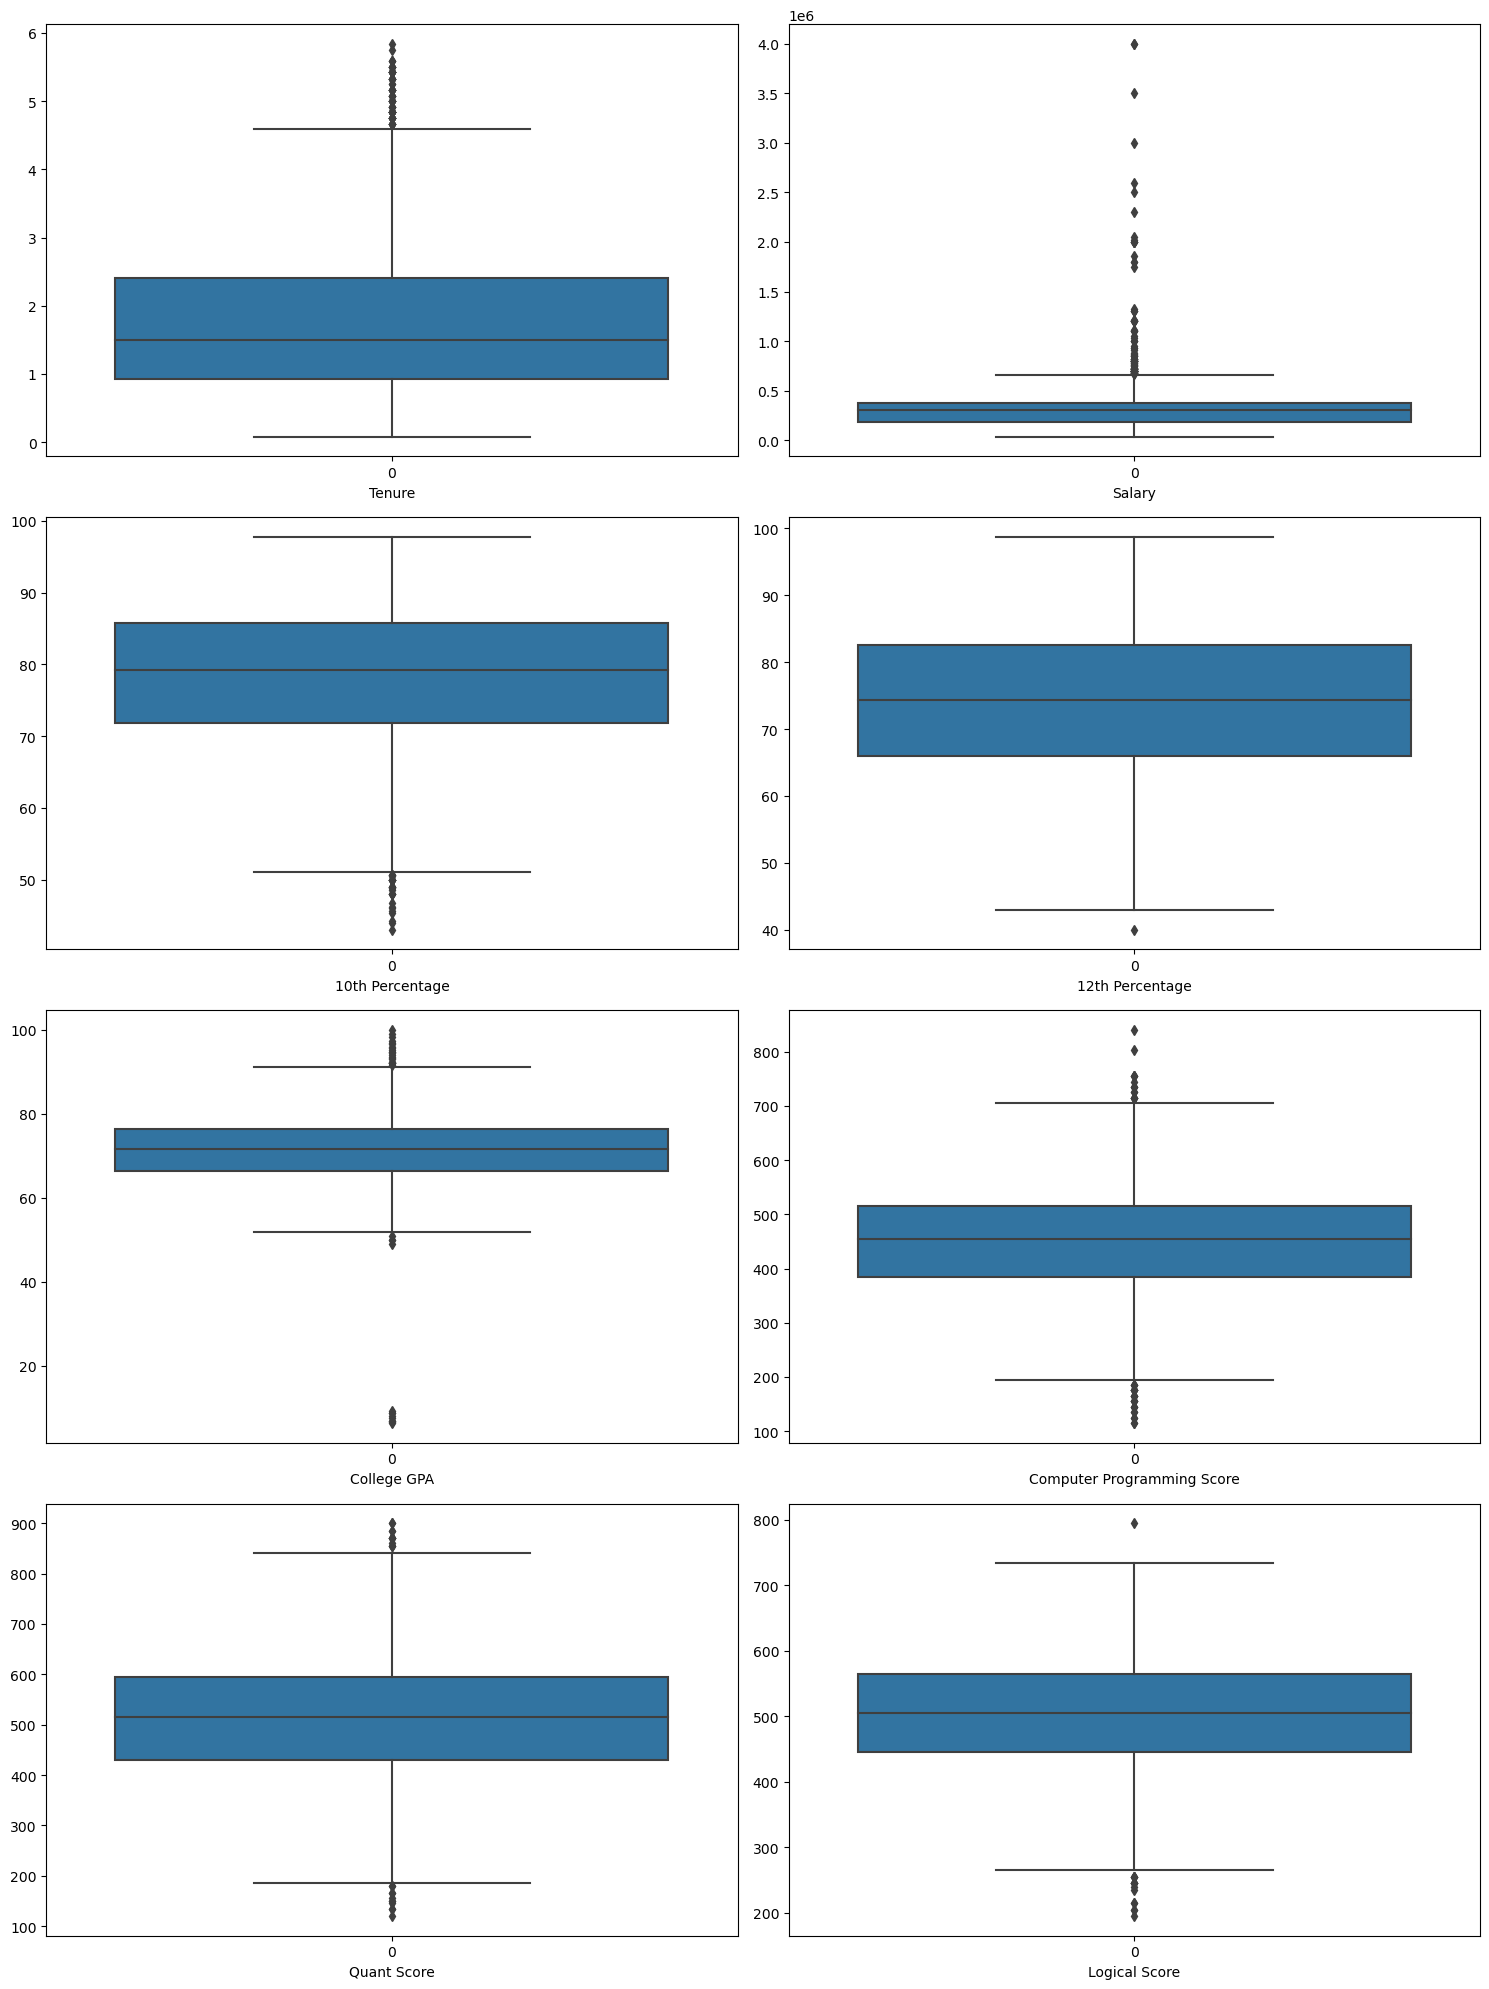

In [68]:
# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Tenure Box Plot
sns.boxplot(df['Tenure'], ax=axs[0, 0])
axs[0, 0].set_xlabel('Tenure')

# Salary Box Plot
sns.boxplot(df['Salary'], ax=axs[0, 1])
axs[0, 1].set_xlabel('Salary')

# 10th Percentage Box Plot
sns.boxplot(df['10percentage'], ax=axs[1, 0])
axs[1, 0].set_xlabel('10th Percentage')

# 12th Percentage Box Plot
sns.boxplot(df['12percentage'], ax=axs[1, 1])
axs[1, 1].set_xlabel('12th Percentage')

# College GPA Box Plot
sns.boxplot(df['collegeGPA'], ax=axs[2, 0])
axs[2, 0].set_xlabel('College GPA')

# Computer Programming Score Box Plot
sns.boxplot(df1['ComputerProgramming'], ax=axs[2, 1])
axs[2, 1].set_xlabel('Computer Programming Score')

# Quant Score Box Plot
sns.boxplot(df1['Quant'], ax=axs[3, 0])
axs[3, 0].set_xlabel('Quant Score')

# Logical Score Box Plot
sns.boxplot(df['Logical'], ax=axs[3, 1])
axs[3, 1].set_xlabel('Logical Score')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Tenure Box Plot: Majority of employees have a tenure within a certain range with few outliers.

Salary Box Plot: Salary distribution shows significant variability with some high outliers.

10th Percentage Box Plot: 10th percentage of candidates spans a wide range with some outliers at the lower end.

12th Percentage Box Plot: 12th percentage also shows variation with some outliers.

College GPA Box Plot: College GPA distribution indicates moderate variability with a few lower outliers.

Computer Programming Score Box Plot: Computer programming scores exhibit variability with a few high outliers.

Quant Score Box Plot: Quant scores show a spread of values with some higher outliers.

Logical Score Box Plot: Logical scores show variability with some higher outliers.

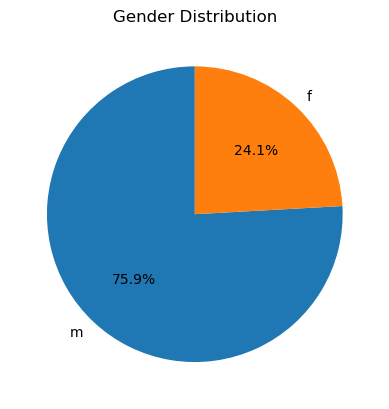

In [76]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()


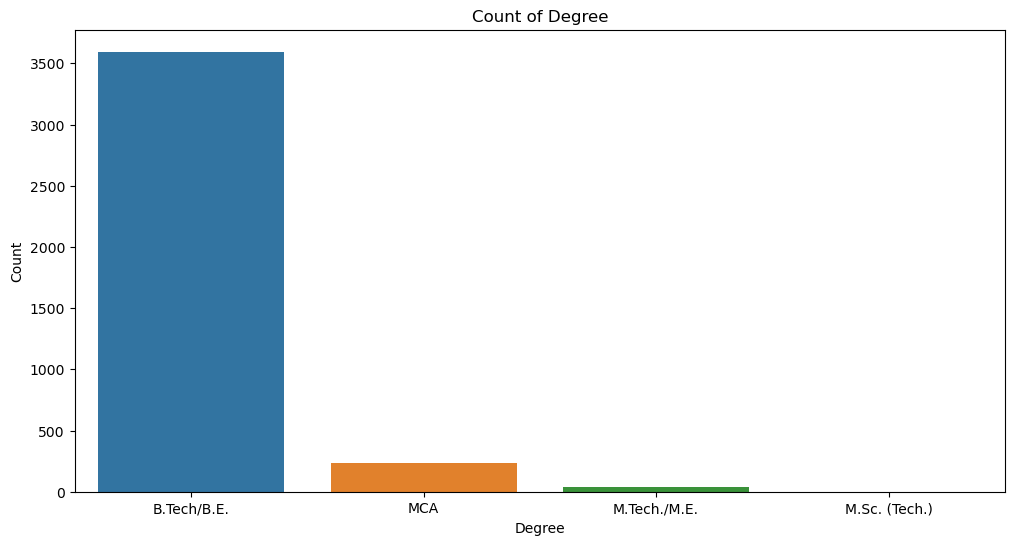

In [70]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Degree', data=df)
plt.title('Count of Degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

Most individuals have a degree in Engineering.

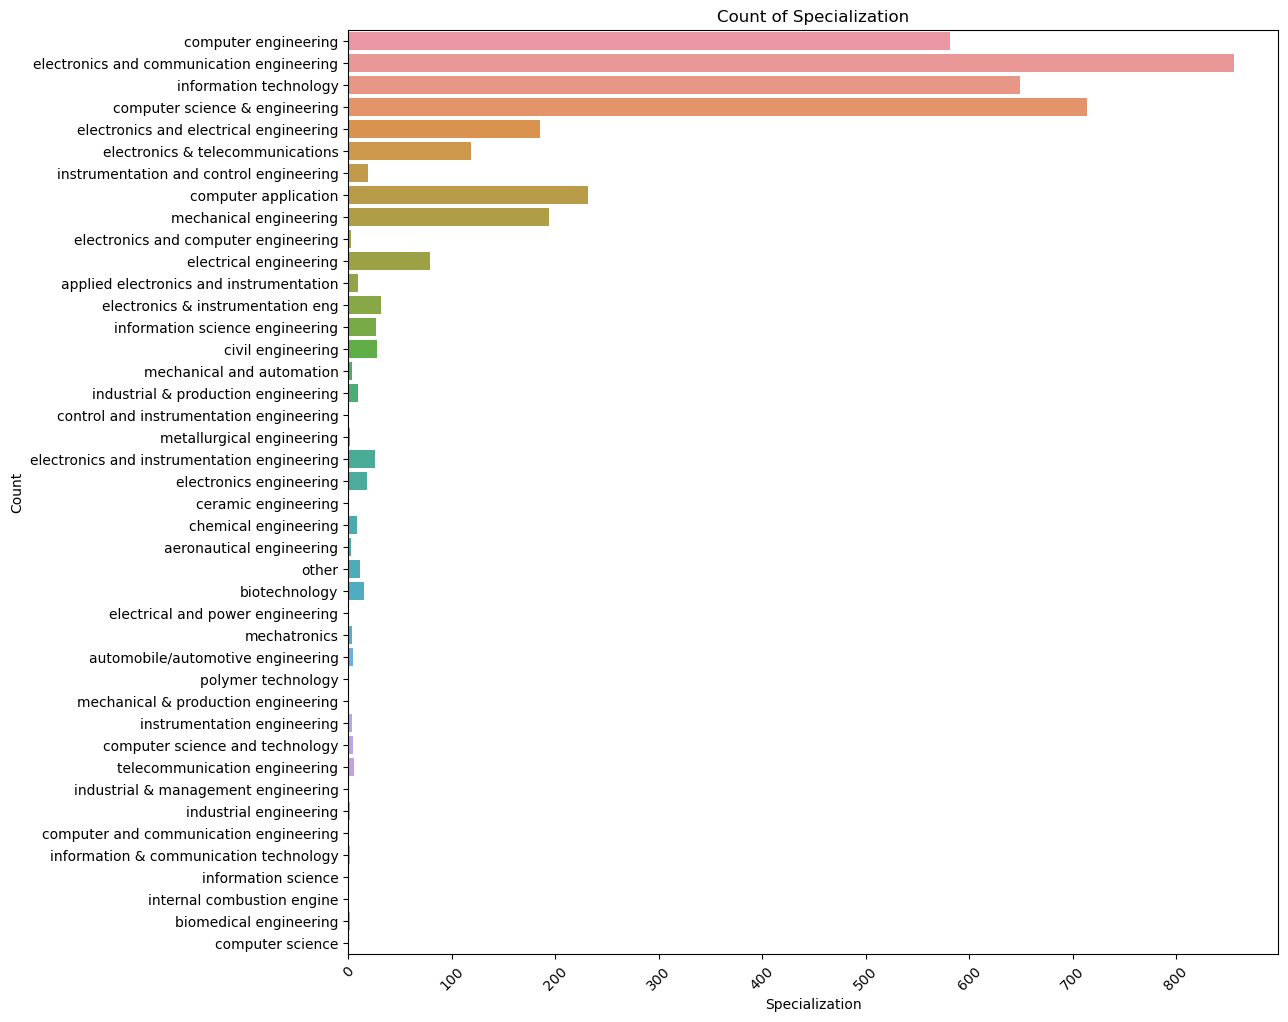

In [71]:
plt.figure(figsize=(12, 12))
sns.countplot(y=df['Specialization'])
plt.title('Count of Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Electronic communication Engineering  and Computer Science & Engineering is the most common specialization.

### Outliers removal

In [79]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [87]:
df.columns
columns = ['Salary','10percentage','12percentage','English',
          'Logical','Quant','Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Tenure']
df1 = df.copy()

In [88]:
for cols in columns:
    lowerbound, upperbound = outlier_treatment(df2[cols])

    df1 = df1.drop(df1[(df1[cols] < lowerbound) | (df1[cols] > upperbound)].index)

In [115]:
df1.shape

(2513, 40)

## Bivariate Analysis


plt.figure(figsize=(8, 4))

sns.barplot(x='Salary', y='Gender', data=df1, palette='RdPu', capsize=0.1)
plt.axvline(df1['Salary'].mean(), color='k', linestyle=':', linewidth=2, label='Overall Avg. Salary')
plt.title('Average Salary per Gender')
plt.xlabel('Salary')
plt.legend()
plt.tight_layout()
plt.show()


Average salary for males tends to be higher than for females.

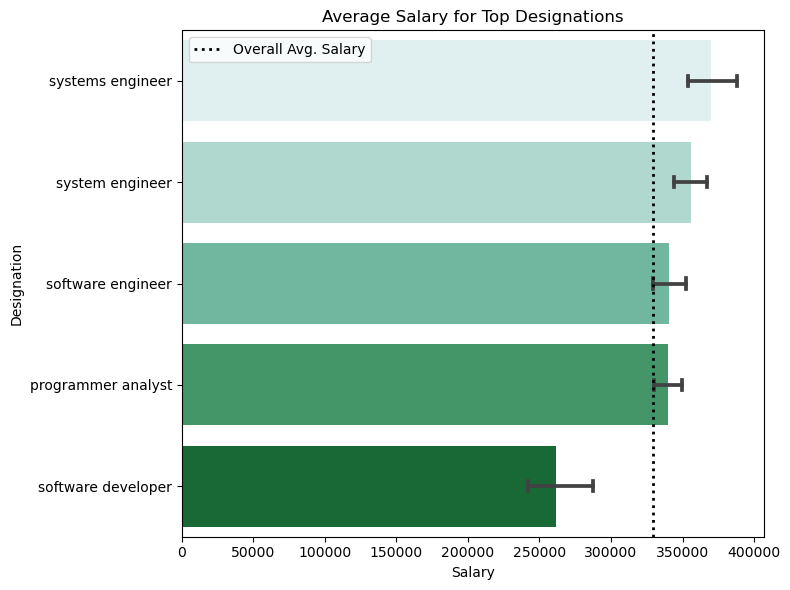

In [126]:
# Get the most frequent designation categories
top_designations = df1['Designation'].value_counts().nlargest(5).index
# Filter the dataframe for only the top designation categories
df_top_designations = df2[df2['Designation'].isin(top_designations)]
plt.figure(figsize=(8, 6))
sns.barplot(x='Salary', y='Designation', data=df_top_designations, palette='BuGn', capsize=0.1)
plt.axvline(df_top_designations['Salary'].mean(), color='k', linestyle=':', linewidth=2, label='Overall Avg. Salary')
plt.title('Average Salary for Top Designations')
plt.xlabel('Salary')
plt.legend()
plt.tight_layout()
plt.show()

Certain designations tend to have higher average salaries compared to others.

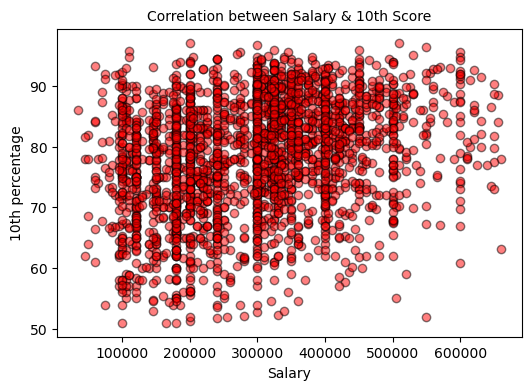

In [118]:
plt.figure(figsize=(6, 4))

plt.scatter(df1['Salary'], df1['10percentage'], ec='k', color='red', alpha=0.5)
plt.title('Correlation between Salary & 10th Score', size=10)
plt.xlabel('Salary')
plt.ylabel('10th percentage')
plt.show()

There is a weak positive correlation between salary and 10th percentage.

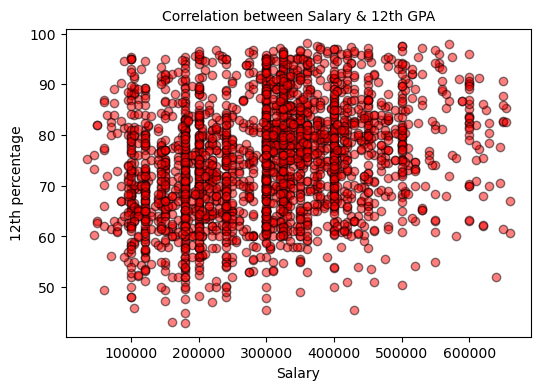

In [127]:
plt.figure(figsize=(6, 4))

plt.scatter(df1['Salary'], df1['12percentage'], ec='k', color='red', alpha=0.5)
plt.title('Correlation between Salary & 12th GPA', size=10)
plt.xlabel('Salary')
plt.ylabel('12th percentage')
plt.show()

There is a weak positive correlation between salary and 12th percentage.

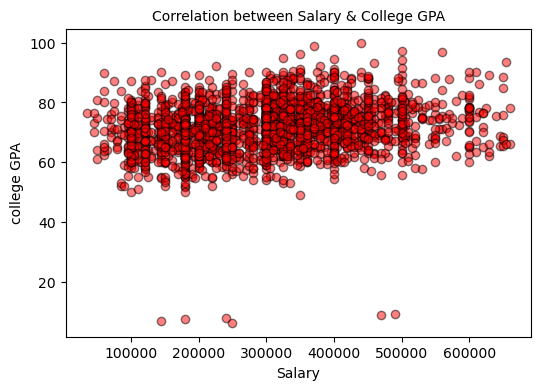

In [128]:
plt.figure(figsize=(6, 4))

plt.scatter(df1['Salary'], df1['collegeGPA'], ec='k', color='red', alpha=0.5)
plt.title('Correlation between Salary & College GPA', size=10)
plt.xlabel('Salary')
plt.ylabel('college GPA')
plt.show()

There is a weak positive correlation between salary and college GPA.

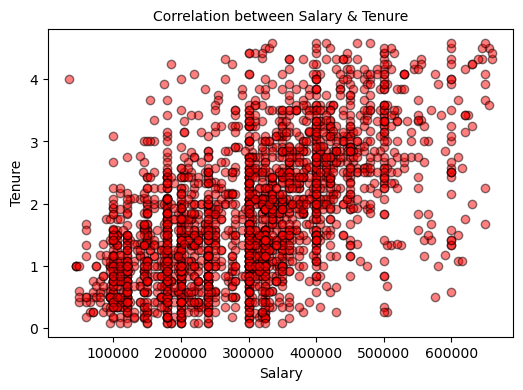

In [129]:
plt.figure(figsize=(6, 4))

plt.scatter(df1['Salary'], df1['Tenure'], ec='k', color='red', alpha=0.5)
plt.title('Correlation between Salary & Tenure', size=10)
plt.xlabel('Salary')
plt.ylabel('Tenure')
plt.show()

There is no apparent correlation between salary and tenure.

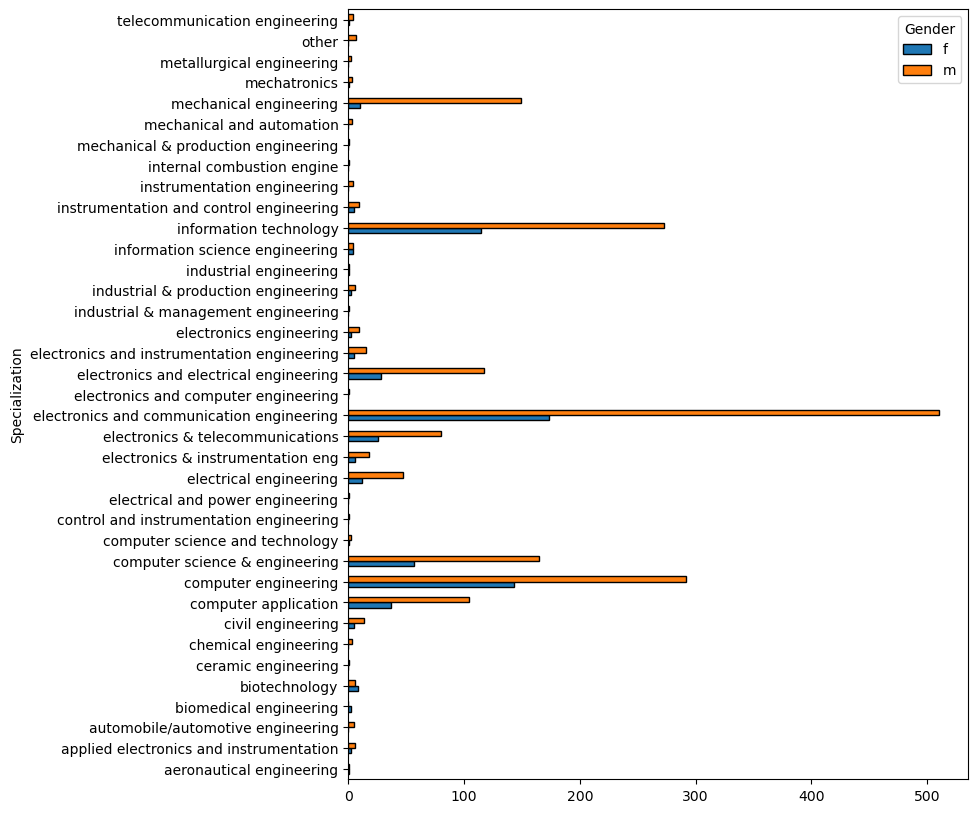

In [134]:
pd.crosstab(df1['Gender'], df1['Specialization']).T.plot(kind='barh', ec='k', figsize=(8, 10))
plt.show()

Distribution of specializations across genders shows certain preferences or disparities.

## Research Questions


1. Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”


In [137]:
designations = df['Designation'].value_counts().sort_index()
pd.set_option('display.max_rows', None)

print(designations)

.net developer                             33
.net web developer                          3
account executive                           4
account manager                             1
admin assistant                             2
administrative coordinator                  1
administrative support                      1
aircraft technician                         1
android developer                          43
application developer                      47
application engineer                       22
apprentice                                  3
ase                                         3
asp.net developer                          26
assistant administrator                     1
assistant electrical engineer               2
assistant engineer                          3
assistant manager                          52
assistant professor                        11
assistant programmer                        2
assistant software engineer                 3
assistant store manager           